## Ex1: Participant Exercise

1. Download the daily stock price of four or five randomly selected stocks. The stocks can belong to one sector.

2. Find out the value at risk (Var) of each stock at 95%.

3. Plot the daily gain or loss of all the stocks in one plot.

4. Find out the probability of making 4% gain in each of the stock.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib as mplot

import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
sbi_df = pd.read_csv('/content/drive/MyDrive/Data Set/SBI.csv', parse_dates=['Date'] )

In [4]:
sbi_df = sbi_df.set_index(['Date'], drop=True)

In [5]:
sbi_df.sort_index(ascending = True, inplace=True)

In [6]:
sbi_df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2022-10-31,573.4,577.10,568.4,573.80,572.676350,507867,11207,290843420,194245.0,38.25,8.70,0.40
2022-11-01,575.2,585.50,574.5,576.75,579.235853,876313,14492,507591908,380241.0,43.39,11.00,1.55
2022-11-02,575.1,578.95,570.0,573.95,575.511491,281391,5840,161943754,113340.0,40.28,8.95,-1.15
2022-11-03,568.8,587.90,568.8,584.80,581.753779,777934,15403,452566044,318196.0,40.90,19.10,16.00
2022-11-04,586.0,596.75,580.6,593.75,587.884765,797243,12564,468687014,282169.0,35.39,16.15,7.75


In [7]:
sbi_df = sbi_df[['Open Price', 'Close Price' ]]

In [8]:
sbi_df['gain'] = ((sbi_df['Close Price']-sbi_df['Open Price'])*100/sbi_df['Open Price'])

<ipython-input-8-61269fbe72a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbi_df['gain'] = ((sbi_df['Close Price']-sbi_df['Open Price'])*100/sbi_df['Open Price'])


In [9]:
sbi_df.head(10)

,Open Price,Close Price,gain
Date,,,
2022-10-31,573.4,573.80,0.069759
2022-11-01,575.2,576.75,0.269471
2022-11-02,575.1,573.95,-0.199965
2022-11-03,568.8,584.80,2.812940
2022-11-04,586.0,593.75,1.322526
2022-11-07,614.0,614.20,0.032573
2022-11-09,620.0,615.55,-0.717742
2022-11-10,610.1,605.70,-0.721193
2022-11-11,616.0,601.10,-2.418831


In [10]:
from scipy import stats

In [11]:
sbi_ci_95 = stats.norm.interval(0.95,
                                loc=sbi_df.gain.mean(),
                                scale=sbi_df.gain.std())


In [12]:
sbi_ci_95


(-3.4053487984661164, 2.802173218810701)

In [13]:
invest_amt = 100000

In [14]:
invest_amt

100000

In [15]:
sbi_ci_95[0]

-3.4053487984661164

In [16]:
sbi_var = invest_amt * sbi_ci_95[0] / 100

In [17]:
sbi_var

-3405.3487984661165

### Note:
Value at risk for 95% CI is 3405.34 rupees, if invested one lakh rupees for day trading in sbi Bank.

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
pnb_df = pd.read_csv('/content/drive/MyDrive/Data Set/PNB.csv', parse_dates=['Date'])


In [20]:
pnb_df.head(5)


,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,2023-03-14,48.05,48.84,47.60,48.17,48.200654,5440612,12296,262241057,637148.0,11.71,1.24,0.12
1,2023-03-13,49.56,50.25,48.02,48.18,49.152601,4556436,12340,223960682,884690.0,19.42,2.23,-1.38
2,2023-03-10,50.50,50.50,49.35,49.94,49.771303,1943849,4432,96747898,303643.0,15.62,1.15,-0.56
3,2023-03-09,51.41,51.78,50.71,50.86,51.273820,2217744,4421,113712206,394928.0,17.81,1.07,-0.55
4,2023-03-08,50.62,51.60,50.62,51.49,51.085807,2381533,3897,121662535,529510.0,22.23,0.98,0.87


In [21]:
pnb_df=pnb_df.set_index(['Date'], drop =True)

In [22]:
pnb_df.head(5)


,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2023-03-14,48.05,48.84,47.60,48.17,48.200654,5440612,12296,262241057,637148.0,11.71,1.24,0.12
2023-03-13,49.56,50.25,48.02,48.18,49.152601,4556436,12340,223960682,884690.0,19.42,2.23,-1.38
2023-03-10,50.50,50.50,49.35,49.94,49.771303,1943849,4432,96747898,303643.0,15.62,1.15,-0.56
2023-03-09,51.41,51.78,50.71,50.86,51.273820,2217744,4421,113712206,394928.0,17.81,1.07,-0.55
2023-03-08,50.62,51.60,50.62,51.49,51.085807,2381533,3897,121662535,529510.0,22.23,0.98,0.87


In [23]:

pnb_df.sort_index(ascending = True, inplace=True)

In [24]:
pnb_df = pnb_df[['Open Price', 'Close Price' ]]

In [25]:
pnb_df['gain'] = ((pnb_df['Close Price']-pnb_df['Open Price'])*100/pnb_df['Open Price'])

In [26]:
pnb_df.head(5)

,Open Price,Close Price,gain
Date,,,
2022-10-31,43.50,42.60,-2.068966
2022-11-01,43.15,40.10,-7.068366
2022-11-02,39.85,39.20,-1.631117
2022-11-03,39.00,41.30,5.897436
2022-11-04,41.60,41.75,0.360577


In [27]:
from scipy import stats

In [28]:
pnb_ci_95 = stats.norm.interval(0.95,
                                loc=pnb_df.gain.mean(),
                                scale=pnb_df.gain.std())


In [29]:

pnb_ci_95

(-5.388692823047226, 5.263199349717164)

In [30]:
invest_amt = 100000

In [31]:
pnb_ci_95[0]

-5.388692823047226

In [32]:
pnb_var = invest_amt * pnb_ci_95[0]/100

In [33]:
pnb_var

-5388.692823047226

### Note:
Value at risk for 95% CI is 5388.69 rupees, if invested one lakh rupees for day trading in pnb Bank.

# Canara


In [34]:
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
import seaborn as sn

In [35]:
canara_df = pd.read_csv('/content/drive/MyDrive/Data Set/canara.csv',
                                                      parse_dates = ['Date'])


In [36]:
canara_df.head(10)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,2023-03-14,288.95,289.70,281.35,286.20,285.482477,588038,6530,167874545,113180,19.25,8.35,-2.75
1,2023-03-13,297.45,303.50,287.60,288.65,296.382739,359854,3989,106654514,56665,15.75,15.90,-8.80
2,2023-03-10,305.50,306.15,295.35,298.10,299.234487,458141,6794,137091587,121406,26.50,10.80,-7.40
3,2023-03-09,311.50,313.75,309.15,310.35,311.688298,312815,3919,97500775,99881,31.93,4.60,-1.15
4,2023-03-08,302.50,312.00,302.10,311.50,308.526504,428724,5063,132272717,161451,37.66,9.90,9.00
5,2023-03-06,306.30,308.95,304.55,305.65,306.524458,296983,4302,91032553,117205,39.47,4.40,-0.65
6,2023-03-03,293.35,306.00,293.35,305.25,300.898214,843293,9505,253745358,474953,56.32,12.65,11.90
7,2023-03-02,288.60,292.85,286.35,290.50,290.058293,252004,3359,73095850,56022,22.23,6.50,1.90
8,2023-03-01,279.00,289.45,279.00,288.60,285.711304,222514,2983,63574765,67325,30.26,10.45,9.60
9,2023-02-28,276.55,280.45,273.95,279.45,278.181858,301817,4130,83960014,128115,42.45,6.50,2.90


In [37]:
canara_df = canara_df.set_index(['Date'], drop = True)

In [38]:
canara_df.head(5)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2023-03-14,288.95,289.70,281.35,286.20,285.482477,588038,6530,167874545,113180,19.25,8.35,-2.75
2023-03-13,297.45,303.50,287.60,288.65,296.382739,359854,3989,106654514,56665,15.75,15.90,-8.80
2023-03-10,305.50,306.15,295.35,298.10,299.234487,458141,6794,137091587,121406,26.50,10.80,-7.40
2023-03-09,311.50,313.75,309.15,310.35,311.688298,312815,3919,97500775,99881,31.93,4.60,-1.15
2023-03-08,302.50,312.00,302.10,311.50,308.526504,428724,5063,132272717,161451,37.66,9.90,9.00


In [39]:
canara_df = canara_df[['Close Price','Open Price']]

In [40]:
canara_df.head(5)

,Close Price,Open Price
Date,,
2023-03-14,286.20,288.95
2023-03-13,288.65,297.45
2023-03-10,298.10,305.50
2023-03-09,310.35,311.50
2023-03-08,311.50,302.50


In [41]:
canara_df['gain'] = ((canara_df['Close Price']-canara_df['Open Price'])*100/(canara_df['Open Price']))

<ipython-input-41-ea899e6a0862>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canara_df['gain'] = ((canara_df['Close Price']-canara_df['Open Price'])*100/(canara_df['Open Price']))


In [42]:
canara_df.head(5)

,Close Price,Open Price,gain
Date,,,
2023-03-14,286.20,288.95,-0.951722
2023-03-13,288.65,297.45,-2.958480
2023-03-10,298.10,305.50,-2.422259
2023-03-09,310.35,311.50,-0.369181
2023-03-08,311.50,302.50,2.975207


In [43]:
canara_df.gain.mean()

-0.1150208642022507

In [44]:
canara_df.gain.std()

2.139010207654068

In [45]:
from scipy import stats

In [46]:
canara_ci_95 = stats.norm.interval(0.95,
                                   loc = canara_df.gain.mean(),
                                   scale = canara_df.gain.std())

In [47]:
canara_ci_95

(-4.307403833767766, 4.077362105363265)

In [48]:
canara_ci_95[0]

-4.307403833767766

In [49]:
investment = 100000


In [50]:
investment

100000

In [51]:
canara_var = investment*canara_ci_95[0]/100

In [52]:
canara_var

-4307.403833767766

### Note:
Value at risk for 95% CI is 4307.40 rupees, if invested one lakh rupees for day trading in canara Bank.

In [53]:
import pandas as pd

In [54]:
indianbank_df = pd.read_csv('/content/drive/MyDrive/Data Set/indianbank.csv',parse_dates = ['Date'])

In [55]:
indianbank_df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,2023-03-14,276.80,285.55,254.30,258.70,262.696277,227981,4519,59889760,69836.0,30.63,31.25,-18.10
1,2023-03-13,283.30,289.05,280.25,282.25,285.274659,61753,1755,17616566,12638.0,20.47,8.80,-1.05
2,2023-03-10,282.50,291.90,277.30,288.05,282.881235,92797,2426,26250530,27913.0,30.08,14.60,5.55
3,2023-03-09,291.00,291.00,284.50,285.85,286.531077,35251,716,10100507,13524.0,38.36,6.50,-5.15
4,2023-03-08,285.55,292.30,283.65,291.25,288.135022,61827,1301,17814524,34748.0,56.20,8.65,5.70


In [56]:
indianbank_df = indianbank_df.set_index(['Date'], drop = True)

In [57]:
indianbank_df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2023-03-14,276.80,285.55,254.30,258.70,262.696277,227981,4519,59889760,69836.0,30.63,31.25,-18.10
2023-03-13,283.30,289.05,280.25,282.25,285.274659,61753,1755,17616566,12638.0,20.47,8.80,-1.05
2023-03-10,282.50,291.90,277.30,288.05,282.881235,92797,2426,26250530,27913.0,30.08,14.60,5.55
2023-03-09,291.00,291.00,284.50,285.85,286.531077,35251,716,10100507,13524.0,38.36,6.50,-5.15
2023-03-08,285.55,292.30,283.65,291.25,288.135022,61827,1301,17814524,34748.0,56.20,8.65,5.70


In [58]:
indianbank_df = indianbank_df[['Close Price','Open Price']]

In [59]:
indianbank_df.head(10)

,Close Price,Open Price
Date,,
2023-03-14,258.70,276.80
2023-03-13,282.25,283.30
2023-03-10,288.05,282.50
2023-03-09,285.85,291.00
2023-03-08,291.25,285.55
2023-03-06,286.90,293.95
2023-03-03,291.95,275.00
2023-03-02,274.25,274.90
2023-03-01,266.65,257.05


In [60]:
indianbank_df['gain']=((indianbank_df['Close Price']-indianbank_df['Open Price'])*100/(indianbank_df['Open Price']))

In [61]:
indianbank_df.head()

,Close Price,Open Price,gain
Date,,,
2023-03-14,258.70,276.80,-6.539017
2023-03-13,282.25,283.30,-0.370632
2023-03-10,288.05,282.50,1.964602
2023-03-09,285.85,291.00,-1.769759
2023-03-08,291.25,285.55,1.996148


In [62]:
from scipy import stats

In [63]:
indianbank_ci_95 = stats.norm.interval(0.95,
                                       loc = indianbank_df.gain.mean(),
                                       scale = indianbank_df.gain.std())

In [64]:
indianbank_ci_95

(-5.181402327383657, 5.334869987522995)

In [65]:
investment = 100000

In [66]:
indianbank_var = investment*indianbank_ci_95[0]/100

In [67]:
indianbank_var

-5181.402327383657

## Note:
Value at risk for 95% CI is 5181.40 rupees, if invested one lakh rupees for day trading in indianBank.

In [68]:
import pandas as pd


In [69]:
unionbank_df = pd.read_csv('/content/drive/MyDrive/Data Set/unionbank.csv',parse_dates = ['Date'])

In [70]:
unionbank_df =unionbank_df[['Close Price','Open Price']]

In [71]:
unionbank_df.head(5)

,Close Price,Open Price
0,66.23,69.05
1,69.25,70.90
2,70.52,71.02
3,72.26,73.41
4,73.42,71.73


In [72]:
unionbank_df['gain']=((unionbank_df['Close Price']-unionbank_df['Open Price'])*100/(unionbank_df['Open Price']))

In [73]:
unionbank_df.head()

,Close Price,Open Price,gain
0,66.23,69.05,-4.083997
1,69.25,70.90,-2.327221
2,70.52,71.02,-0.704027
3,72.26,73.41,-1.566544
4,73.42,71.73,2.356057


In [74]:
from scipy import stats

In [75]:
unionbank_ci_95 = stats.norm.interval(0.95,
                                      loc = unionbank_df.gain.mean(),
                                      scale = unionbank_df.gain.std())

In [76]:
unionbank_ci_95

(-7.211625645307824, 7.478527620889907)

In [77]:
unionbank_var = 100000*unionbank_ci_95[0]/100

In [78]:
unionbank_var

-7211.625645307824

## Note:
Value at risk for 95% CI is 7211.62 rupees, if invested one lakh rupees for day trading in unionBank.

### Final Result of q 1

1.Value at risk for 95% CI is 3405.34 rupees, if invested one lakh rupees for day trading in sbi Bank.

2.Value at risk for 95% CI is 5388.69 rupees, if invested one lakh rupees for day trading in pnb Bank.

3.Value at risk for 95% CI is 4307.40 rupees, if invested one lakh rupees for day trading in canara Bank.

4.Value at risk for 95% CI is 5181.40 rupees, if invested one lakh rupees for day trading in indianBank.

5.Value at risk for 95% CI is 7211.62 rupees, if invested one lakh rupees for day trading in unionBank.

## Q3.Plot the daily gain or loss of all the stocks in one plot.

In [79]:
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
import seaborn as sn

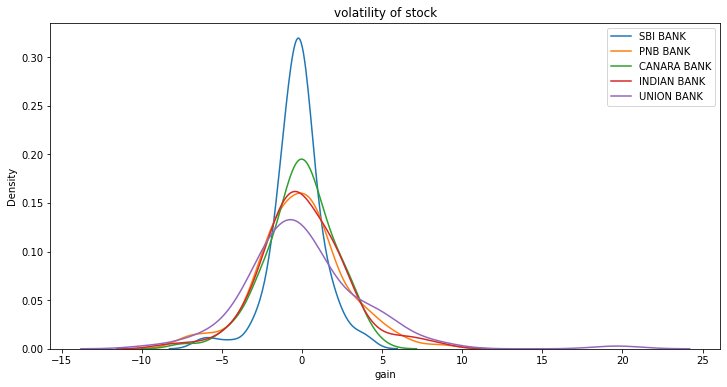

In [81]:
plt.figure(figsize = (12,6))
sn.kdeplot(sbi_df.gain, label = 'SBI BANK');
sn.kdeplot(pnb_df.gain, label = 'PNB BANK');
sn.kdeplot(canara_df.gain,label = 'CANARA BANK');
sn.kdeplot(indianbank_df.gain,label ='INDIAN BANK');
sn.kdeplot(unionbank_df.gain,label = 'UNION BANK');
plt.title('volatility of stock')
plt.legend()

## Find out the probability of making 4% gain in each of the stock.

### SBI Bank - probability of a gain of 4%

In [83]:
1 - stats.norm.cdf(4.0,
                   loc = sbi_df.gain.mean(),
                   scale = sbi_df.gain.std())

0.0033001252479318843

### PNB Bank - probability of a gain of 4%

In [84]:
1 - stats.norm.cdf(4.0,
                   loc = pnb_df.gain.mean(),
                   scale = pnb_df.gain.std())

0.0674437984219276

### canara Bank - probability of a gain of 4%

In [85]:
1 - stats.norm.cdf(4.0,
                   loc = canara_df.gain.mean(),
                   scale = canara_df.gain.std())

0.027190033117045376

### indian Bank - probability of a gain of 4%


In [87]:
1 - stats.norm.cdf(4.0,
                   loc = indianbank_df.gain.mean(),
                   scale = indianbank_df.gain.std())

0.07181680231006515

### UNION Bank - probability of a gain of 4%

In [88]:
1-stats.norm.cdf(4.0,
                 loc = unionbank_df.gain.mean(),
                 scale = unionbank_df.gain.std())


0.1510941775586283